# Devoir Maison -  Optimisation sous Python
    LENOIR Yoan - CORRE Guillaume - LEFAFTA Rémi

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sympy.abc import lamda
sym.init_printing()
x,y,R,a,b=sym.symbols('x y R a b',real=True)

In [7]:
f=(x-3)**2*(x-1)**2-(y-1)**2

## $I$. Résolution des points critiques et leur nature

La fonction que nous allons étudier est la suivante: $f(x,y)=(x-3)^2(x-1)^2-(y-1)^2$

Pour répondre à cette question, nous allons décomposer notre raisonnement en trois parties: 
* Recherche des points critiques, du gradient et de la hessienne de la fonction $f$ et de celles aux points critiques
* Calcul des mineurs pour pour chaque hessienne. 
* Et enfin, la nature des points critiques.

### $1$. Points critiques, gradient et Hessienne

In [8]:
def pts_critiques(f): 
    """Calcul des points critiques d'une fonction et de leur nature"""
    gradf=sym.Matrix([[f.diff(x)],[f.diff(y)]]) #calcul du gradient
    fxx=f.diff(x,x)
    fxy=f.diff(x,y)
    fyy=f.diff(y,y)
    pc=sym.solve(gradf,x,y) #calcul des points critiques
    Hessf=sym.Matrix([[fxx,fxy],[fxy,fyy]]) #donne la hessienne
    Hessienne=[]
    for i in pc:
        Hessienne.append(Hessf.subs({x:i[0],y:i[1]})) #donne la hessienne au points critiques
    return Hessienne,pc,gradf,Hessf

### $2$. Mineurs

In [9]:
def mineurs_pc(f):
    """Calcul des mineurs des hessiennes aux points critiques.
    Possible pour deux variables."""
    H=pts_critiques(f)[0]
    L=[]
    for k in range(len(H)):
        Lbis=[]
        Lbis.append(H[k][0])
        Lbis.append(H[k].det())
        L.append(Lbis) #Sort une liste des mineurs
    return(L) 

### $3$. Nature des points critiques

In [10]:
def nature_pc(f):
    """Choix de la nature d'un point critique"""
    mineurs=mineurs_pc(f)
    Hess=pts_critiques(f)[0]
    Hessf=pts_critiques(f)[3]
    pc=pts_critiques(f)[1]
    gradf=pts_critiques(f)[2]
    print ("La fonction est")
    display(f) 
    print('Le gradient de la fonction est ')
    display (gradf)
    print('Les points critiques de la fonction sont')
    display(pc)
    print('La hessienne en tout point est')
    display(Hessf)
    print('Les Hessiennes au points critiques sont ')
    display(Hess)
    for n in range(0,len(mineurs)):
        print( pc[n])
        if (np.array(mineurs[n])>0).all(): 
            print('est un min')
        elif mineurs[n][0]<0 and mineurs[n][1]>0:
            print('est un max')
        elif (np.array(mineurs[n])!=0).all(): 
            print('est un point selle')
        elif (np.array(mineurs[n][1::2])<0).any():
            print('est un point selle')
        else: 
            print('On ne conclut pas')

La fonction est


Le gradient de la fonction est 


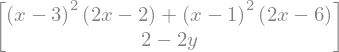

Les points critiques de la fonction sont


La hessienne en tout point est


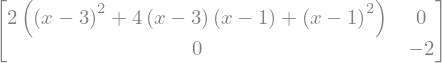

Les Hessiennes au points critiques sont 


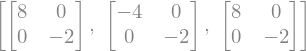

(1, 1)
est un point selle
(2, 1)
est un max
(3, 1)
est un point selle


In [11]:
nature_pc(f)

**Ici, le point critique (2,1) est un maximum local alors que (1,1) et (3,1) sont des points selles.**

### $4$. Graphiques :

Un premier graphqiue sur les courbes de niveaux de la fonction : 

Text(0.5, 1.0, 'Courbes de niveaux de la fonction f')

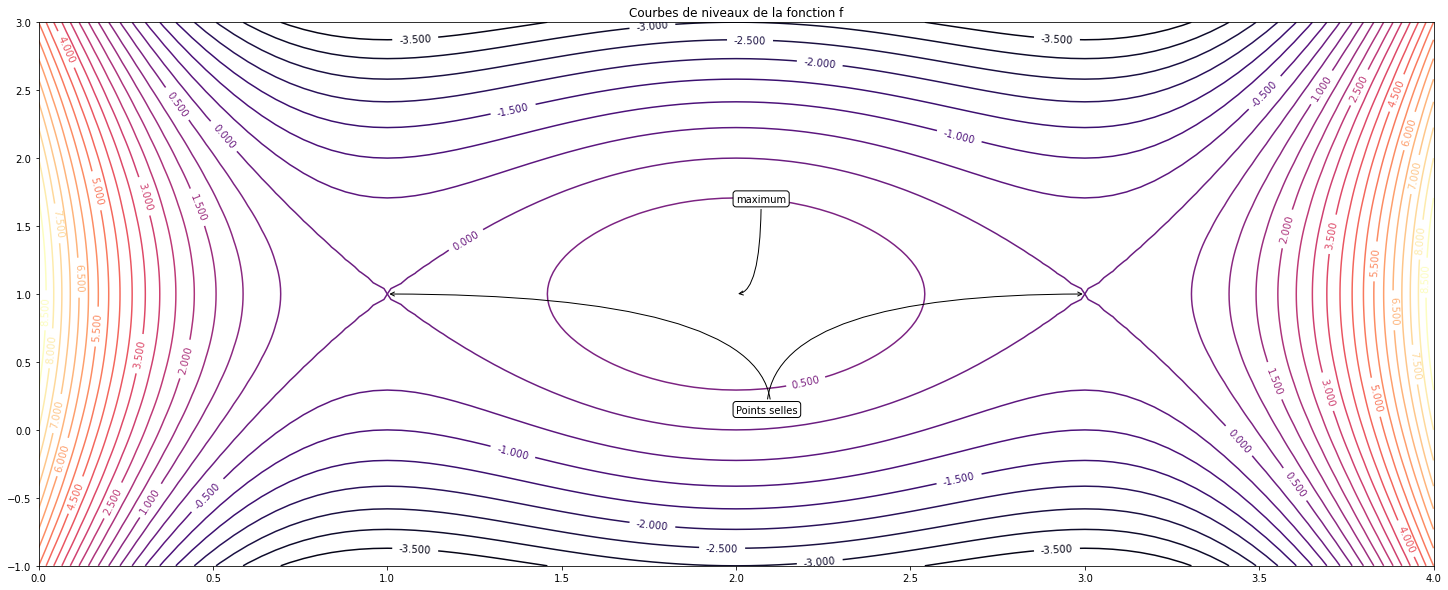

In [12]:
plt.rc('figure',figsize=(25,10))

ax=plt.gca()
x1=np.linspace(0, 4, 101)
y1=np.linspace(-1, 3, 101)
xx, yy = np.meshgrid(x1,y1)
zz=(xx-3)**2*(xx-1)**2-(yy-1)**2

level_set=plt.contour(xx, yy, zz,  np.arange(zz.min(), zz.max(), 0.5),cmap=plt.cm.magma)
plt.clabel(level_set, inline=1, fontsize=10)

ax.plot(3,3)
ax.annotate('maximum', xy=(2,1), xytext=(2,1.7),va="center", ha="left",
            bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->",connectionstyle='angle3'))
ax.annotate('', xy=(1,1), xytext=(2.1,0.15),va="center", ha="left",
            bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->",connectionstyle='angle3'))
ax.annotate('Points selles', xy=(3,1), xytext=(2,0.15),va="center", ha="left",
            bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="->",connectionstyle='angle3'))

plt.title('Courbes de niveaux de la fonction f')

Un second qui représente la surface 

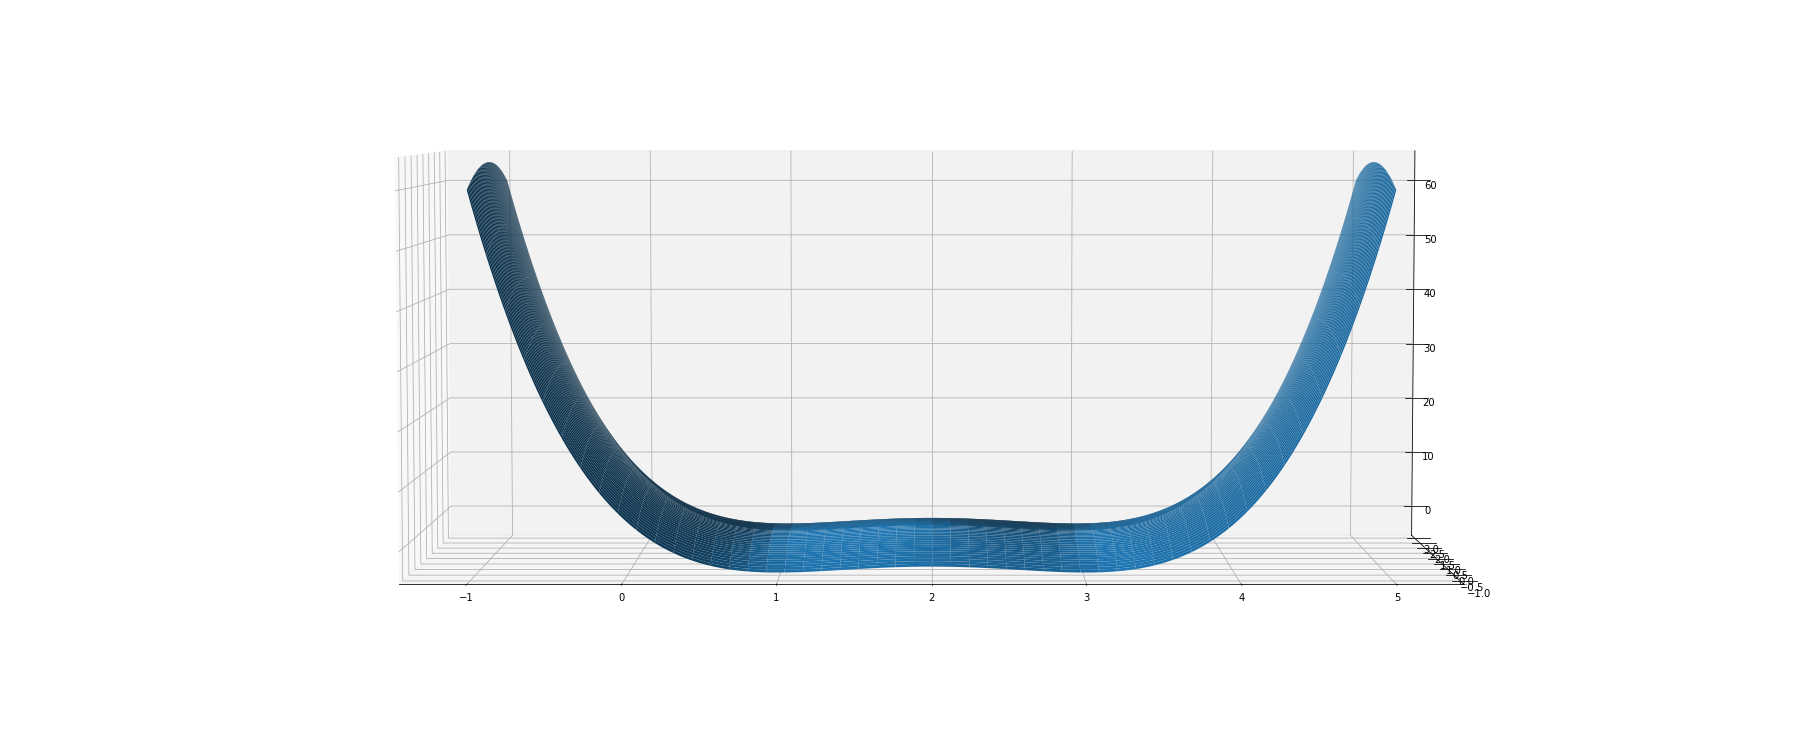

In [13]:
x1=np.linspace(-1.0, 5, 500)
y1=np.linspace(-1.0, 3, 500)
xx, yy = np.meshgrid(x1,y1)
zz=((xx-3)**2)*((xx-1)**2)-(yy-1)**2
fig = plt.figure()
ax=Axes3D(fig)
surf=ax.plot_surface(xx,yy,zz)


ax.view_init(4,-90)

On remarque clairement les 3 points critiques avec le maximum en (2,1) et les points selles en (1,1) et (3,1).

La surface prend une forme de cuvette avec une petite bosse en son fond.

## $II$. Maximum de la fonction sous la contrainte 

Dans cette question, il faut prendre en considération la contrainte $(x-1)^2+(y-1)^2 \leq R^2$
que l'on ecrira : 
$g(x,y) = (x-1)^2+(y-1)^2 - R^2 = 0$ pour étudier le bord.
   

Dans la première question, nous avons fait une recherche des points critiques et en avons conclu que nous avons deux points selles et un candidat pour être un maximum (2,1)
Ce point critique vérifie $(-1)^2*1^2-0^2 = 1$ donc est bien à l'intérieur de la contrainte si $R\geq 1$

**Passons à l'étude du bord :**

Tout d'abord,nous cherchons les points $(x,y)$ tels que $\exists\lambda\in\mathbb{R}, \nabla f(x,y) = \lambda\nabla g(x,y)$ 
et $(x-1)^2+(y-1)^2 = R^2$.


Et donc nous appliquons le Langrangien de la fonction $f$ sous contrainte:
$$\mathcal{L}(x,y,\lambda)=(x-3)^2(x-1)^2-(y-1)^2-\lambda((x-1)^2+(y-1)-R^2)$$

Nous allons décomposer notre travail en plusieurs étapes: 
* Création de la jacobienne. 
* Application de la $CN1$: Calculer les points critiques du Lagrangien.
* Application de la $CS2$: Calculer la Hessienne bordée en un point $(x,y,\lambda)$ et à tous les points critiques.
* Trouver la nature des points critiques 

Dans notre cas, nous avons deux variables et une contrainte donc nous allons calculer les $n-m$ derniers mineurs. Ici, $n-m=1$ donc ce qui revient à calculer le determinant de la matrice $H$. 

Nous recherchons un maximum, il faut donc que $|H|$ soit du signe de $(-1)^n$. 
Si $|H|=0$, on ne pourra pas conclure.

In [39]:
R = 2 #Choix de R (R doit être positif)

###  $1$. Jacobienne 

In [15]:
g=(x-1)**2+(y-1)**2 #Ecriture de la contrainte.

In [16]:
def jacobienne(f,g,R):
    """Renvoie la jacobienne de la contrainte"""
    R2=R**2
    gbis = g-R2
    jacobienne=sym.Matrix([[gbis.diff(x)],[gbis.diff(y)]])   
    return jacobienne

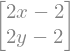

In [17]:
jacobienne(f,g,R)

*Jacobienne*

Grâce à la jacobienne ci-dessus, la fonction est donc dérivable, la CQND est vérifiée et le rang de la matrice est 1.    

### $2$. CN1

In [18]:
def CN1(f,g,R):
    """Création de la fonction du lagrangien et en output son gradient"""
    assert R > 0
    R2 = R**2
    gbis = g-R2
    L=f-(lamda*gbis)
    Lx=L.diff(x)
    Ly=L.diff(y)
    Lgbis=L.diff(lamda)
    gradient=sym.Matrix([[Lx],[Ly],[Lgbis]])
    points_critiques=sym.solve(gradient,x,y,lamda)
    return gradient

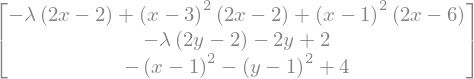

In [19]:
CN1(f,g,R)

*Gradient du Lagrangien*

In [20]:
def CN1bis(f,g,R):
    """Sortie des points critiques du lagrangien"""
    gradient=CN1(f,g,R)
    points_critiques=sym.solve(gradient,x,y,lamda)
    return  points_critiques

In [21]:
CN1bis(f,g,R)

*Les points critiques du Lagrangien*

### $3$. CS2

In [22]:
def CS2(f,g,R):
    """Ecriture de la Hessienne en tout point"""
    R2 = R**2
    gbis = g-R2
    L=f-(lamda*gbis)
    Lx=L.diff(x)
    Ly=L.diff(y)
    Lgbis=L.diff(lamda)

    Lxx=Lx.diff(x)
    Lxy=Lx.diff(y)
    Lxl=Lx.diff(lamda)
    Lyy=Ly.diff(y)
    Lyx=Ly.diff(x)
    Lyl=Ly.diff(lamda)
    Lll=Lgbis.diff(lamda)
    Llx=Lgbis.diff(x)
    Lly=Lgbis.diff(y)
    Hessienne=sym.Matrix([[Lll,Llx,Lly],[Lxl,Lxx,Lxy],[Lyl,Lyx,Lyy]])
    return  Hessienne  

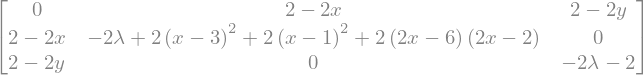

In [23]:
CS2(f,g,R)

*Hessienne en tout point*

In [24]:
def hessfinales(f,g,R):
    """Création des hessiennes aux points critiques"""
    points_critiques=CN1bis(f,g,R)
    Hessienne=CS2(f,g,R)
    Hessfinales=[] 
    for pc in points_critiques:
        sub=Hessienne.subs({x:pc[0],y:pc[1],lamda:pc[2]})
        Hessfinales.append(sub)
    return Hessfinales

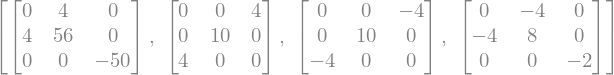

In [25]:
hessfinales(f,g,R)

*Hessiennes aux points critiques*

In [26]:
def determinant(f,g,R):
    """Calcul le determinant de chaque matrice hessienne"""
    Hessfinales=hessfinales(f,g,R)
    Det=[]
    for matrice in Hessfinales:
        Det.append(matrice.det())
    return Det

In [27]:
determinant(f,g,R)

*Déterminants des hessiennes*

In [28]:
def valeurs(f,g,R):
    """Renvoie la valeur de la fonction si on remplace x et y par les points critiques."""
    points_critiques=CN1bis(f,g,R)
    liste_valeurs=[]
    for i in points_critiques:
        liste_valeurs.append(f.subs({x:i[0],y:i[1]}))
    return liste_valeurs

### $4$. Nature des points critiques

In [29]:
def nature_pc(f,g,R):
    """Renvoi le point critique, sa nature et sa valeur dans la fonction"""
    points_critiques=CN1bis(f,g,R)
    Det=determinant(f,g,R)
    valeur=valeurs(f,g,R)
    maxi=max(valeur)
    mini=min(valeur)
    for i in range(len(Det)):
        display(points_critiques[i])
        if Det[i]>0:
            if valeur[i] == maxi:
                print('est un maximum global en', valeur[i])
            else:
                print('est un maximum en', valeur[i])
        elif Det[i]<0:
            if valeur[i] == mini:
                print('est un minimum global en', valeur[i])
            else:
                print('est un minimum en', valeur[i])

In [30]:
nature_pc(f,g,R)

est un maximum global en 64


est un minimum global en -4


est un minimum global en -4


est un maximum en 0


**Le point critique qui a la plus forte valeur en son extrema est un maximum global, dans notre exemple le max est pour le premier point critique**

### $5$. Graphiques : 

**Pour R = 2 (notre exemple)**

In [40]:
def graphique(R):
    x=np.linspace(-2.0, 4, 601)
    y=np.linspace(-1.0, 4, 601)
    ax=plt.gca()
    xx, yy = np.meshgrid(x,y)
    zz=((xx-3)**2) * ((xx-1)**2) - (yy-1)**2
    plt.contour(xx,yy,zz, np.arange(zz.min(),zz.max(),0.6))
    plt.colorbar()


    t=np.linspace(-np.pi, np.pi, 501)
    x=np.cos(t)
    y=np.sin(t)
    plt.plot(R*x+1, R*y+1,ls='-',label='cercle',color='red')
    plt.legend()
    plt.title('Courbes de niveau de la fonction f et contrainte avec R')

    ax.plot(3,3)
    ax.annotate('maximum global', xy=(1-R,1), xytext=(-0.5,1.5),va="center", ha="left",
                bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->",connectionstyle='angle3'))
    ax.annotate('maximum local trouvé à la question 1', xy=(2,1), xytext=(1.4,2.2),va="center", ha="left",
                bbox=dict(boxstyle="round", fc="w"),
                      arrowprops=dict(arrowstyle="->",connectionstyle='angle3'))

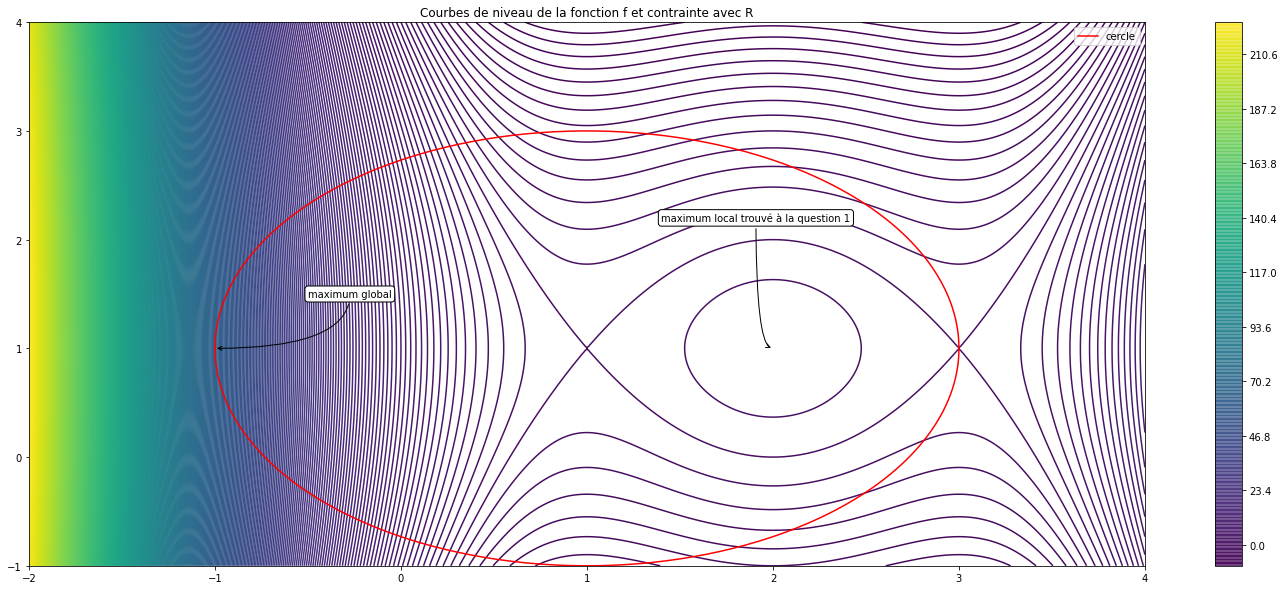

In [44]:
graphique(2)

**On peut voir que peu importe R, le maximum sera toujours sur le bord car plus l'on se décale vers la gauche plus les valeurs augmentent. Cela renvoi au graphique de la surface à la question 1 ou nous voyons très clairement une sorte de cuvette**

## $III$. Maximum de la fonction sous la contrainte et y,x >=0

Si on rajoute les contraintes $x\geq0$ et $y\geq0$, on obtient un nouveau lagrangien de la forme : 

$L(x,y,\lambda,a,b) = f(x,y)-\lambda(g1)-a(g2)-b(g3)$, avec a,b correspondant à lambda 2 et lambda 3 et g1, g2, g3 les contraintes

On a : 

$g_1 = (x-1)^2+(y-1)^2 - R^2 = 0$

  $g_2= -x$ car $x\geq0$ equivaut à $-x\leq0$ et de la même manière $g_3= -y$

On écrit le lagrangien :

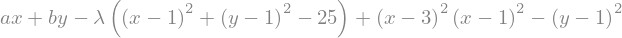

In [33]:
z=(x-3)**2*(x-1)**2-(y-1)**2-lamda*((x-1)**2+(y-1)**2-5**2)-a*(-x)-b*(-y)
display(z)

On créer le gradient du lagrangien : 

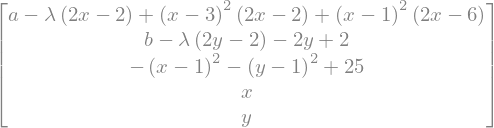

In [34]:
    zx=z.diff(x)
    zy=z.diff(y)
    zgbis=z.diff(lamda)
    zgsecond=z.diff(a)
    zgter=z.diff(b)
    gradient=sym.Matrix([[zx],[zy],[zgbis],[zgsecond],[zgter]])
    display(gradient)

On cherche les points critiques : 

In [45]:
solu=sym.solve(gradient,x,y,lamda,a,b)
display(solu)

On remarque qu'il n'y a pas de points critiques, ce qui veut dire que le seul maximum est le point (2,1) trouvé à la question 1 et cela pour n'importe quelle valeur de R.
Toutefois ce resultat semble faux puisque plus le rayon s'agrandit, plus le disque va se rapprocher des bords montant de la surface de la fonction f donc il doit y avoir un maximum sur le bord du disque.